## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [2]:
# 1
 
import pandas as pd

car_df = pd.read_csv('./data/car_data.csv')

car_df.head()



,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
car_df.shape

(1000, 5)

In [7]:
# 2

# summarize the variables
summary = car_df.describe(include='all')

# check for missing val
missing_values = car_df.isnull().sum()

# convert the gender categorical variable into a dummy variable
car_df['Gender'] = car_df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

# create a matrix X of predictors and an outcome y
X = car_df[['Age', 'AnnualSalary']]
y = car_df['Purchased']

(summary, missing_values)


(           User ID       Gender          Age   AnnualSalary    Purchased
 count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
 mean    500.500000     0.516000    40.106000   72689.000000     0.402000
 std     288.819436     0.499994    10.707073   34488.341867     0.490547
 min       1.000000     0.000000    18.000000   15000.000000     0.000000
 25%     250.750000     0.000000    32.000000   46375.000000     0.000000
 50%     500.500000     1.000000    40.000000   72000.000000     0.000000
 75%     750.250000     1.000000    48.000000   90000.000000     1.000000
 max    1000.000000     1.000000    63.000000  152500.000000     1.000000,
 User ID         0
 Gender          0
 Age             0
 AnnualSalary    0
 Purchased       0
 dtype: int64)

In [8]:
# 3

# MinMax normalize Age and AnnualSalary in X
X_normalized = (X - X.min()) / (X.max() - X.min())

# Check the first few rows of the normalized data
X_normalized.head()


,Age,AnnualSalary
0,0.377778,0.036364
1,0.488889,0.207273
2,0.688889,0.429091
3,0.488889,0.672727
4,0.155556,0.465455


In [9]:
# 4

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Check the dimensions of the training and testing data
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((800, 2), (200, 2), (800,), (200,))

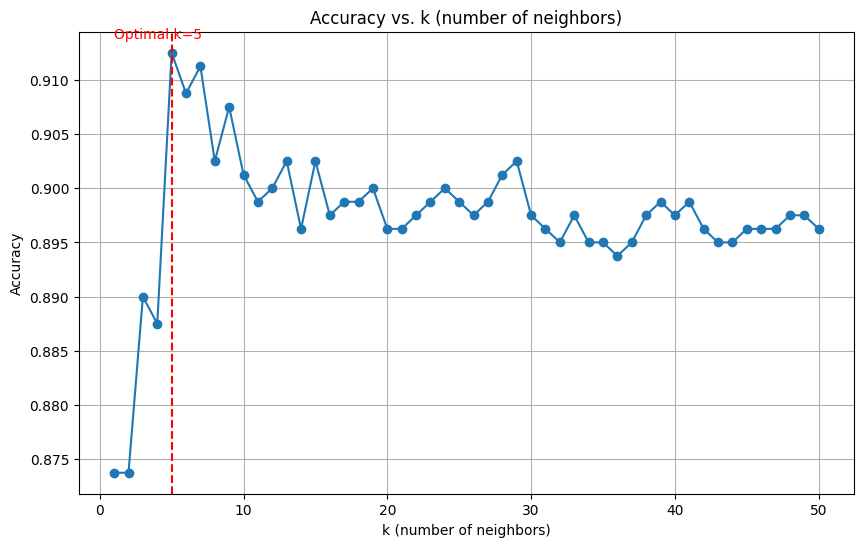

5

In [10]:
# 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# range of k values to try
k_values = np.arange(1, 51)

# list to store cross-validation scores
cv_scores = []

# Find the best k using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# determine the best k
best_k = k_values[np.argmax(cv_scores)]

# plotting the cross-validation scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. k (number of neighbors)')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.axvline(x=best_k, color='r', linestyle='--')
plt.annotate(f'Optimal k={best_k}', (best_k, max(cv_scores)), textcoords="offset points", xytext=(-10,10), ha='center', color='r')

plt.grid(True)
plt.show()

best_k


In [12]:
# 6

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# init and fit the model with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=best_k)
knn_optimal.fit(X_train, y_train)

# predict the outcomes for the testing set
y_pred = knn_optimal.predict(X_test)

# generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# classification report for detailed metrics
class_report = classification_report(y_test, y_pred)

conf_matrix


array([[106,   6],
       [ 12,  76]], dtype=int64)

In [14]:
accuracy

0.91

In [13]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.90      0.95      0.92       112\n           1       0.93      0.86      0.89        88\n\n    accuracy                           0.91       200\n   macro avg       0.91      0.91      0.91       200\nweighted avg       0.91      0.91      0.91       200\n'

1.6

The model predicts a sale when one fails to occur (false positive) 6 times and predicts no sale when one does occur (false negative) 12 times. Overall, it's pretty accurate with an accuracy of 91%.

In [9]:
# 7
# add predictions to the dataframe
car_df['Predicted_Purchase'] = knn_optimal.predict(X_normalized)

# separate data for men and women
data_men = car_df[car_df['Gender'] == 0]  # Men
data_women = car_df[car_df['Gender'] == 1]  # Women

# compute confusion matrices for men and women
conf_matrix_men = confusion_matrix(data_men['Purchased'], data_men['Predicted_Purchase'])
conf_matrix_women = confusion_matrix(data_women['Purchased'], data_women['Predicted_Purchase'])

# calculate accuracy for men and women
accuracy_men = accuracy_score(data_men['Purchased'], data_men['Predicted_Purchase'])
accuracy_women = accuracy_score(data_women['Purchased'], data_women['Predicted_Purchase'])

(conf_matrix_men, accuracy_men, conf_matrix_women, accuracy_women)


(array([[293,   8],
        [ 22, 161]], dtype=int64),
 0.9380165289256198,
 array([[269,  28],
        [ 16, 203]], dtype=int64),
 0.9147286821705426)

1.7

- The model has slightly higher accuracy for men (93.8%) compared to women (91.5%).
- For men, the model predicts a sale when one fails to occur 8 times and predicts no sale when one does occur 22 times.
- For women, the model predicts a sale when one fails to occur 28 times and predicts no sale when one does occur 16 times.

The model is a little bit more accurate for men compared to women, although not by much. It's important to consider subgroup performance to make sure the model is fair and does not favor one group over another. These differences might be due to various factors, like different purchasing behaviors between genders or imbalances in the training data. 

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [11]:
# 1

car_usa_df = pd.read_csv('./data/USA_cars_datasets.csv')

car_usa_df = car_usa_df[['price', 'year', 'mileage']]

# Check for NAs, view head, and get dimensions
na_check = car_usa_df.isna().sum()
data_head = car_usa_df.head()
data_shape = car_usa_df.shape

na_check, data_head, data_shape


(price      0
 year       0
 mileage    0
 dtype: int64,
    price  year  mileage
 0   6300  2008   274117
 1   2899  2011   190552
 2   5350  2018    39590
 3  25000  2014    64146
 4  27700  2018     6654,
 (2499, 3))

In [13]:
# 2

# normalizing 'year' and 'mileage' with maxmin
data_normalized = car_usa_df.copy()
data_normalized['year'] = (car_usa_df['year'] - car_usa_df['year'].min()) / (car_usa_df['year'].max() - car_usa_df['year'].min())
data_normalized['mileage'] = (car_usa_df['mileage'] - car_usa_df['mileage'].min()) / (car_usa_df['mileage'].max() - car_usa_df['mileage'].min())

# head
data_normalized.head()


,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [14]:
# 3

# define the features and the target
X = data_normalized[['year', 'mileage']]
y = data_normalized['price']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of the training and test sets
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


(((1999, 2), (1999,)), ((500, 2), (500,)))

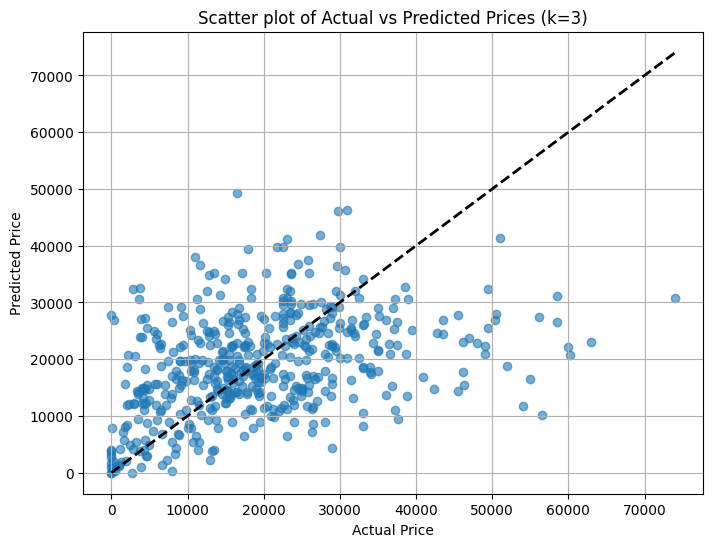

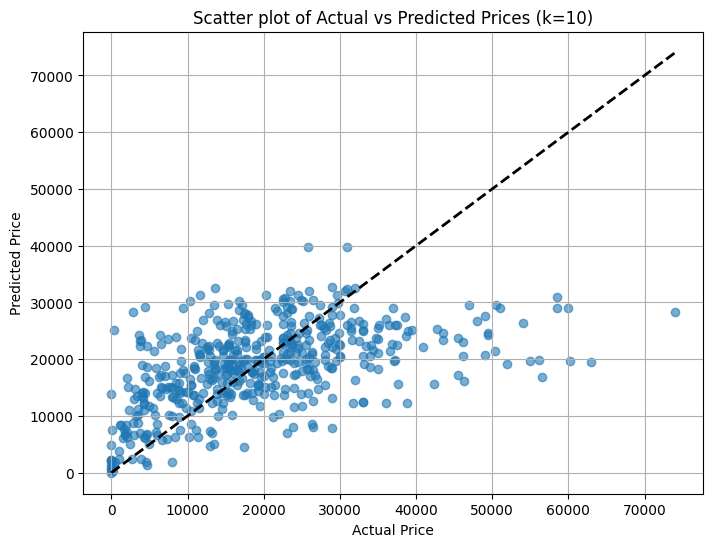

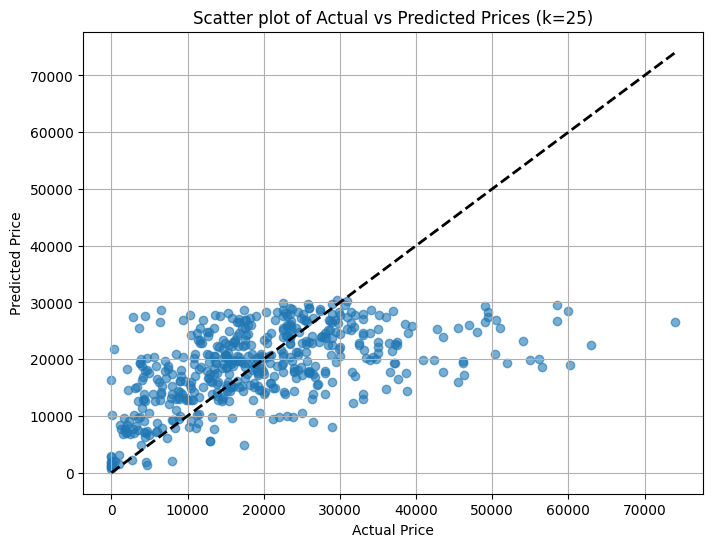

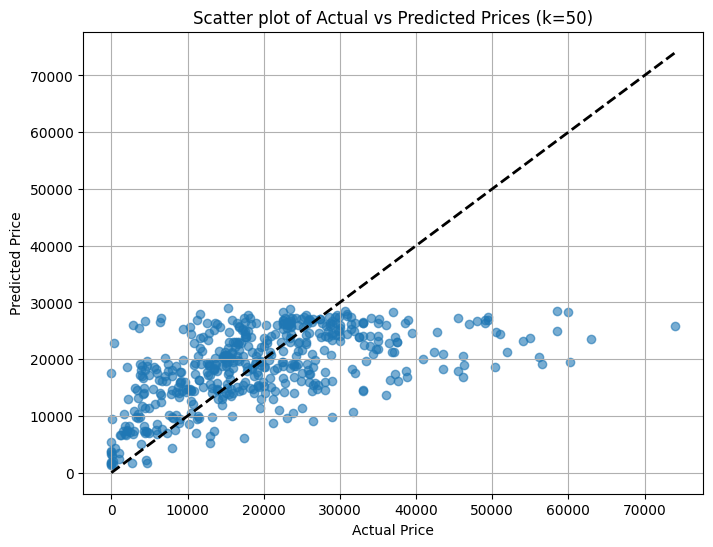

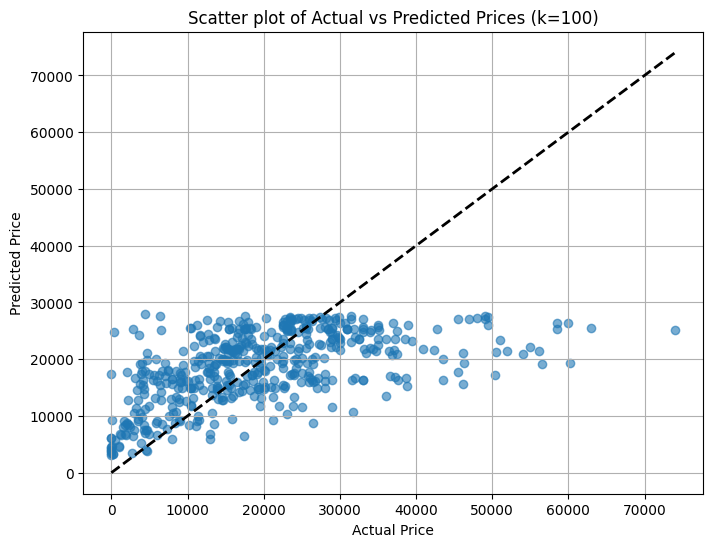

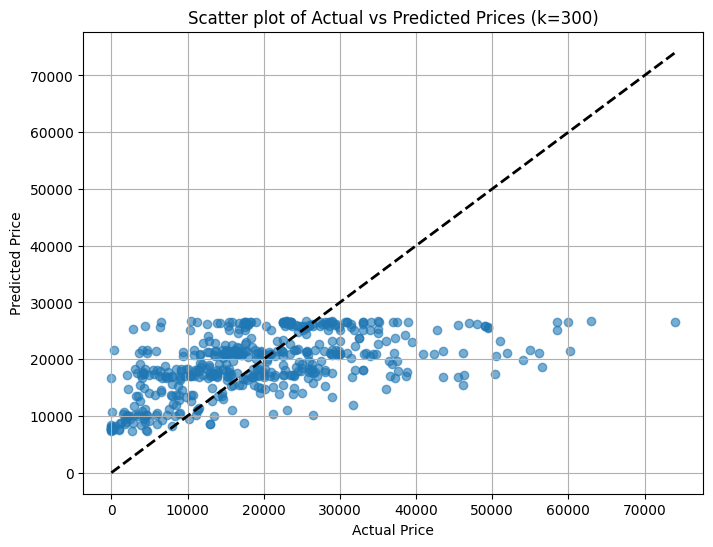

[73996851093.1111,
 58699563053.020004,
 56287168795.95039,
 55101274650.7148,
 56133031668.7336,
 57250237508.85794]

In [15]:
# 4

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# define k values to be tested
k_values = [3, 10, 25, 50, 100, 300]

# init a dictionary to store results (SSE and predictions) for each k
results = {
    'k': [],
    'SSE': [],
    'predictions': []
}

# perform kNN regression for each k value
for k in k_values:
    # init and fit the kNN regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    
    # predict the prices on the test set
    predictions = knn_regressor.predict(X_test)
    
    # compute SSE
    sse = mean_squared_error(y_test, predictions, squared=True) * len(y_test)
    
    # store results
    results['k'].append(k)
    results['SSE'].append(sse)
    results['predictions'].append(predictions)
    
    # scatter plot: Actual vs Predicted prices
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Scatter plot of Actual vs Predicted Prices (k={k})')
    plt.grid(True)
    plt.show()

results['SSE']



2.4

As $k$ increases, the model tends to make predictions that are closer to the mean of the target variable (price), leading to underfitting. 

In [16]:
# 5

# find the optimal k
optimal_k_index = results['SSE'].index(min(results['SSE']))
optimal_k = results['k'][optimal_k_index]

optimal_k, results['SSE'][optimal_k_index]


(50, 55101274650.7148)

2.6

- Underfitting: As $k$ increases, the model begins to underfit. The predictions become less sensitive to the variations in the data and tend to average out the results. 

- Overfitting: When $k$ is too low (like k=3), the model captures a lot of the training data noise, leading to overfitting. In the scatter plot, the predictions for k=3 show a wide dispersion as it tries to mimic the training data closely, and results in a higher SSE.


**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [23]:
# 1

airbnb_df = pd.read_csv('./data/airbnb_hw.csv')
airbnb_df.head()



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [24]:
# Price: remove non-numeric characters and convert to float
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'].replace('[\$,]', '', regex=True), errors='coerce')

# Beds: replace NaN values with the median.

airbnb_df['Beds'].fillna(airbnb_df['Beds'].median(), inplace=True)

# Review Scores Rating: replace NaN values with the median.

airbnb_df['Review Scores Rating'].fillna(airbnb_df['Review Scores Rating'].median(), inplace=True)

airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [25]:
# 2

# maxmin normalization
columns_to_normalize = ['Beds', 'Number Of Reviews', 'Review Scores Rating']

# calculate min and max for the columns
min_values = airbnb_df[columns_to_normalize].min()
max_values = airbnb_df[columns_to_normalize].max()

# apply normalization
airbnb_data_normalized = airbnb_df.copy()
airbnb_data_normalized[columns_to_normalize] = (airbnb_df[columns_to_normalize] - min_values) / (max_values - min_values)

# check the normalization
airbnb_data_normalized[columns_to_normalize].head(), airbnb_data_normalized[columns_to_normalize].describe()


(     Beds  Number Of Reviews  Review Scores Rating
 0  0.0625           0.000000                 0.925
 1  0.0625           0.003891                 0.925
 2  0.0625           0.003891                 0.925
 3  0.1875           0.000000                 0.925
 4  0.1875           0.151751                 0.950,
                Beds  Number Of Reviews  Review Scores Rating
 count  30478.000000       30478.000000          30478.000000
 mean       0.095538           0.046766              0.906766
 std        0.063395           0.085528              0.094982
 min        0.000000           0.000000              0.000000
 25%        0.062500           0.000000              0.875000
 50%        0.062500           0.011673              0.925000
 75%        0.125000           0.050584              0.962500
 max        1.000000           1.000000              1.000000)

In [26]:
# 3

from sklearn.cluster import KMeans

# selecting the features for clustering
features = ['Beds', 'Number Of Reviews', 'Review Scores Rating']
X = airbnb_data_normalized[features]

# applying KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
airbnb_data_normalized['Cluster'] = kmeans.fit_predict(X)

# checking the clustering result
airbnb_data_normalized[['Cluster'] + features].head(), airbnb_data_normalized['Cluster'].value_counts()


c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(   Cluster    Beds  Number Of Reviews  Review Scores Rating
 0        0  0.0625           0.000000                 0.925
 1        0  0.0625           0.003891                 0.925
 2        0  0.0625           0.003891                 0.925
 3        5  0.1875           0.000000                 0.925
 4        1  0.1875           0.151751                 0.950,
 0    19342
 3     3826
 1     3295
 5     2573
 4      829
 2      613
 Name: Cluster, dtype: int64)

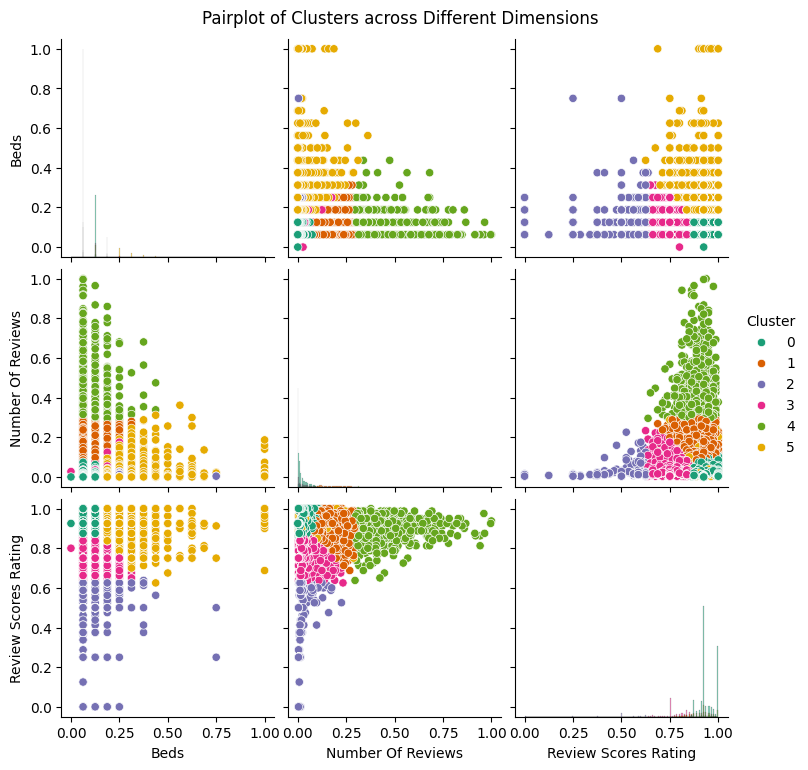

In [27]:
# 4
import seaborn as sns

# visualizing the clusters
plot = sns.pairplot(data=airbnb_data_normalized, vars=features, hue='Cluster', palette='Dark2', diag_kind='hist')
plt.suptitle("Pairplot of Clusters across Different Dimensions", y=1.02)
plt.show()


In [29]:
# 5

# calculating average price for each cluster
cluster_price_summary = airbnb_data_normalized.groupby('Cluster')['Price'].describe()

# displaying average price per cluster and sorting to find the highest averages
cluster_price_summary[['mean', 'std']].sort_values(by='mean', ascending=False)


,mean,std
Cluster,,
5,335.157404,423.093670
0,152.379640,166.693970
1,144.149014,86.692391
2,134.949429,219.643738
4,133.184560,82.375691
3,132.800836,114.546871


5.5

Cluster 1 has the highest average rental price, although it also has a fairly large standard deviation, which means a wide range of prices within this cluster.

c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

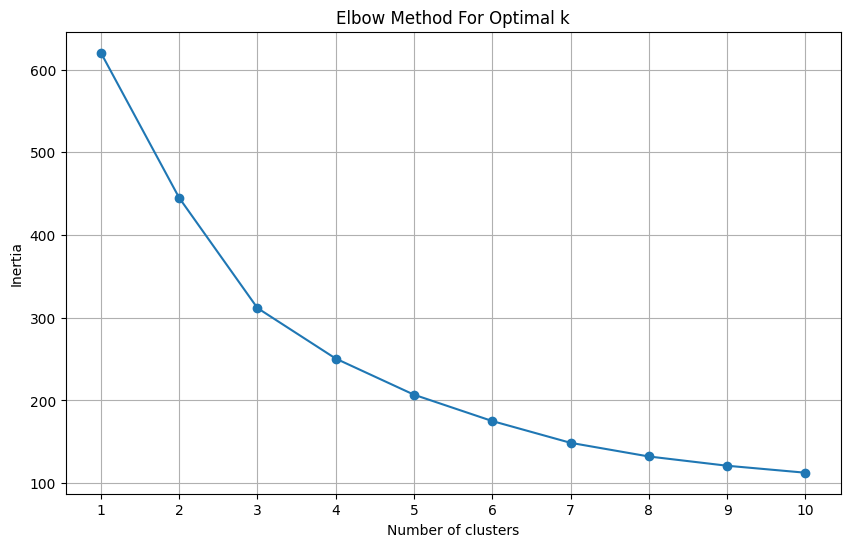

In [30]:
# 6

# determining the optimal number of clusters (k) using the elbow method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# plotting the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?